<h1 style="font-size:3rem;color:orange;">Directing User Subscriptions</h1>

<h2 style="font-size:2rem;color:orange;">EDA (Exploratory Data Analysis) and Feature Engineering</h2>

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from dateutil import parser

### Import Data

In [2]:
df_users = pd.read_csv("data/app-user-data.csv")

### Raw Data Peek

In [3]:
df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
print(df_users.dtypes)

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object


In [5]:
df_users.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [6]:
# Get the number of null values and corresponding columns
null_counts = df_users.isnull().sum()
null_columns = null_counts[null_counts > 0].index

# Display null results
print("Number of null values in each column:")
print(null_counts)

print("\nColumns with null values:")
print(null_columns)

Number of null values in each column:
user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

Columns with null values:
Index(['enrolled_date'], dtype='object')


In [7]:
# Convert the 'first_open' and 'enrolled_date' columns to datetime format
df_users["first_open"] = pd.to_datetime(df_users["first_open"])
df_users["enrolled_date"] = pd.to_datetime(df_users["enrolled_date"])

# Convert null values in 'enrolled_date' 
missing_date = pd.NaT

# Fill missing values with a new date-time format
df_users['enrolled_date'] = df_users['enrolled_date'].fillna(pd.to_datetime(missing_date))


# Convert the hour parameter to a string to extract what we want, then convert to type int
df_users['hour'] = df_users.hour.str.slice(1, 3).astype(int)

df_users.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


# Plotting

In [8]:
# Get numerical features 
numerical_features = ['age', 'numscreens']

df_users_numerical = df_users[numerical_features].copy()
df_users_numerical.head()

,age,numscreens
0,23,15
1,24,13
2,23,3
3,28,40
4,31,32


In [9]:
# Get categorical features
categorical_features = ['first_open', 'screen_list', 'enrolled_date', 'enrolled', 'dayofweek', 'hour', 'minigame', 'used_premium_feature', 'liked']

df_users_categorical = df_users[categorical_features].copy()
df_users_categorical.head()

,first_open,screen_list,enrolled_date,enrolled,dayofweek,hour,minigame,used_premium_feature,liked
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaT,0,3,2,0,0,0
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,Scan...",NaT,0,6,1,0,0,0
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaT,0,1,19,0,1,1
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513,1,4,16,0,0,0
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841,1,1,18,0,0,1


In [10]:
# Extract month and hour into separate columns for 'enrolled_date'
df_users_categorical['enrolled_date_month'] = df_users_categorical['enrolled_date'].dt.month
df_users_categorical['enrolled_date_hour'] = df_users_categorical['enrolled_date'].dt.hour

# Extract month into separate column for 'first_open'
df_users_categorical['first_open_month'] = df_users_categorical['first_open'].dt.month

# Display the modified dataframe
df_users_categorical.head()

,first_open,screen_list,enrolled_date,enrolled,dayofweek,hour,minigame,used_premium_feature,liked,enrolled_date_month,enrolled_date_hour,first_open_month
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanP...",NaT,0,3,2,0,0,0,NaN,NaN,12
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,Scan...",NaT,0,6,1,0,0,0,NaN,NaN,12
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaT,0,1,19,0,1,1,NaN,NaN,3
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finan...",2013-07-05 16:11:49.513,1,4,16,0,0,0,7.0,16.0,7
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",2013-02-26 18:56:37.841,1,1,18,0,0,1,2.0,18.0,2


In [11]:
# Explore 'screen_list' field

# Set the maximum column width to display the full content
pd.set_option('display.max_colwidth', None)

# Display
df_users_categorical.head()

# Address this in Feature Engineering

,first_open,screen_list,enrolled_date,enrolled,dayofweek,hour,minigame,used_premium_feature,liked,enrolled_date_month,enrolled_date_hour,first_open_month
0,2012-12-27 02:14:51.273,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login",NaT,0,3,2,0,0,0,NaN,NaN,12
1,2012-12-02 01:16:00.905,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2",NaT,0,6,1,0,0,0,NaN,NaN,12
2,2013-03-19 19:19:09.157,"Splash,Cycle,Loan",NaT,0,1,19,0,1,1,NaN,NaN,3
3,2013-07-05 16:08:46.354,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2",2013-07-05 16:11:49.513,1,4,16,0,0,0,7.0,16.0,7
4,2013-02-26 18:50:48.661,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review",2013-02-26 18:56:37.841,1,1,18,0,0,1,2.0,18.0,2


In [12]:
# Reset the maximum column width option to default
pd.reset_option('display.max_colwidth')

## Histograms

<Figure size 640x480 with 0 Axes>

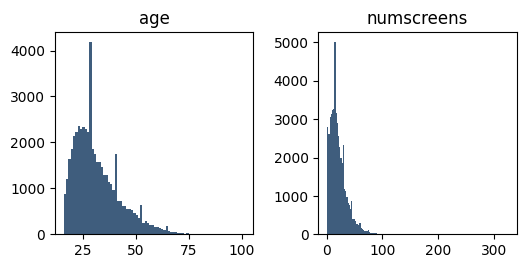

In [13]:
plt.suptitle('Histograms of Numerical App User Data', fontsize = 20)

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_users_numerical.shape[1]+1):
    plt.subplot(3, 3, col)
    feat = plt.gca()
    feat.set_title(df_users_numerical.columns.values[col-1])
    vals = np.size(df_users_numerical.iloc[:, col-1].unique())
    plt.hist(df_users_numerical.iloc[:, col - 1], bins=vals, color='#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Figure size 640x480 with 0 Axes>

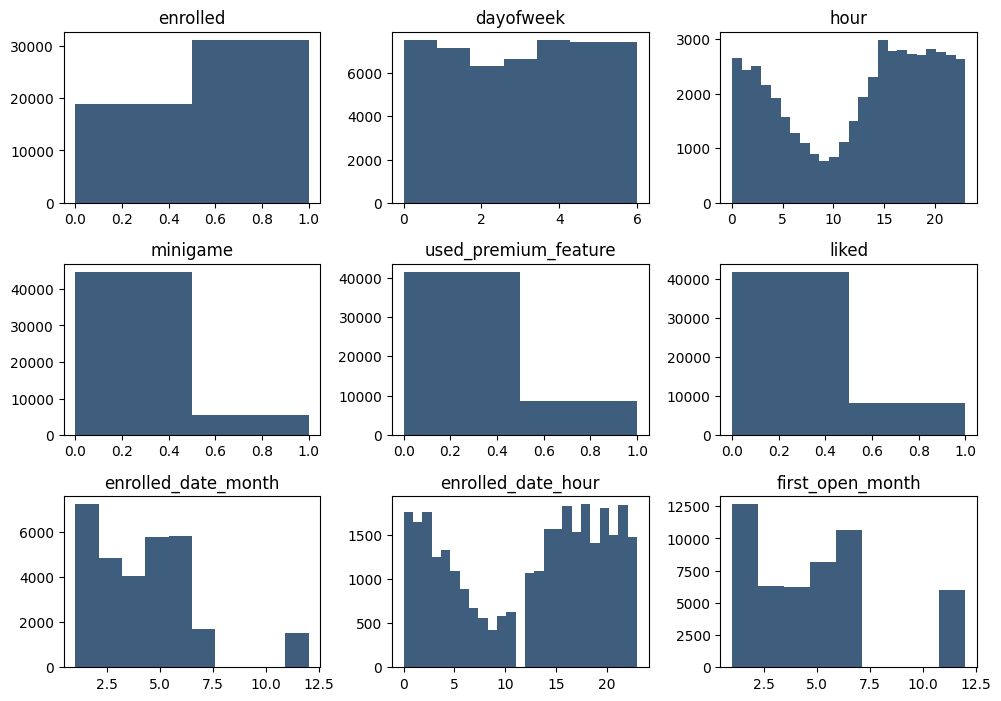

In [14]:
plt.suptitle('Histograms of Categorical App User Data', fontsize = 20)

# Filter categorical fields
df_cat_filter = df_users_categorical.drop(columns=['first_open', 'screen_list', 'enrolled_date']).copy()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create the subplots with increased spacing
plt.subplots_adjust(hspace=0.5, wspace=0.7)

for col in range(1, df_cat_filter.shape[1] + 1):
    plt.subplot(4, 3, col)
    feat = plt.gca()
    feat.set_title(df_cat_filter.columns.values[col - 1])
    vals = np.size(df_cat_filter.iloc[:, col - 1].unique())
    plt.hist(df_cat_filter.iloc[:, col - 1], bins=vals, color='#3F5D7D')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation with Response

<Axes: title={'center': 'Numerical Features Estimated Correlation with Subscription Enrollment'}>

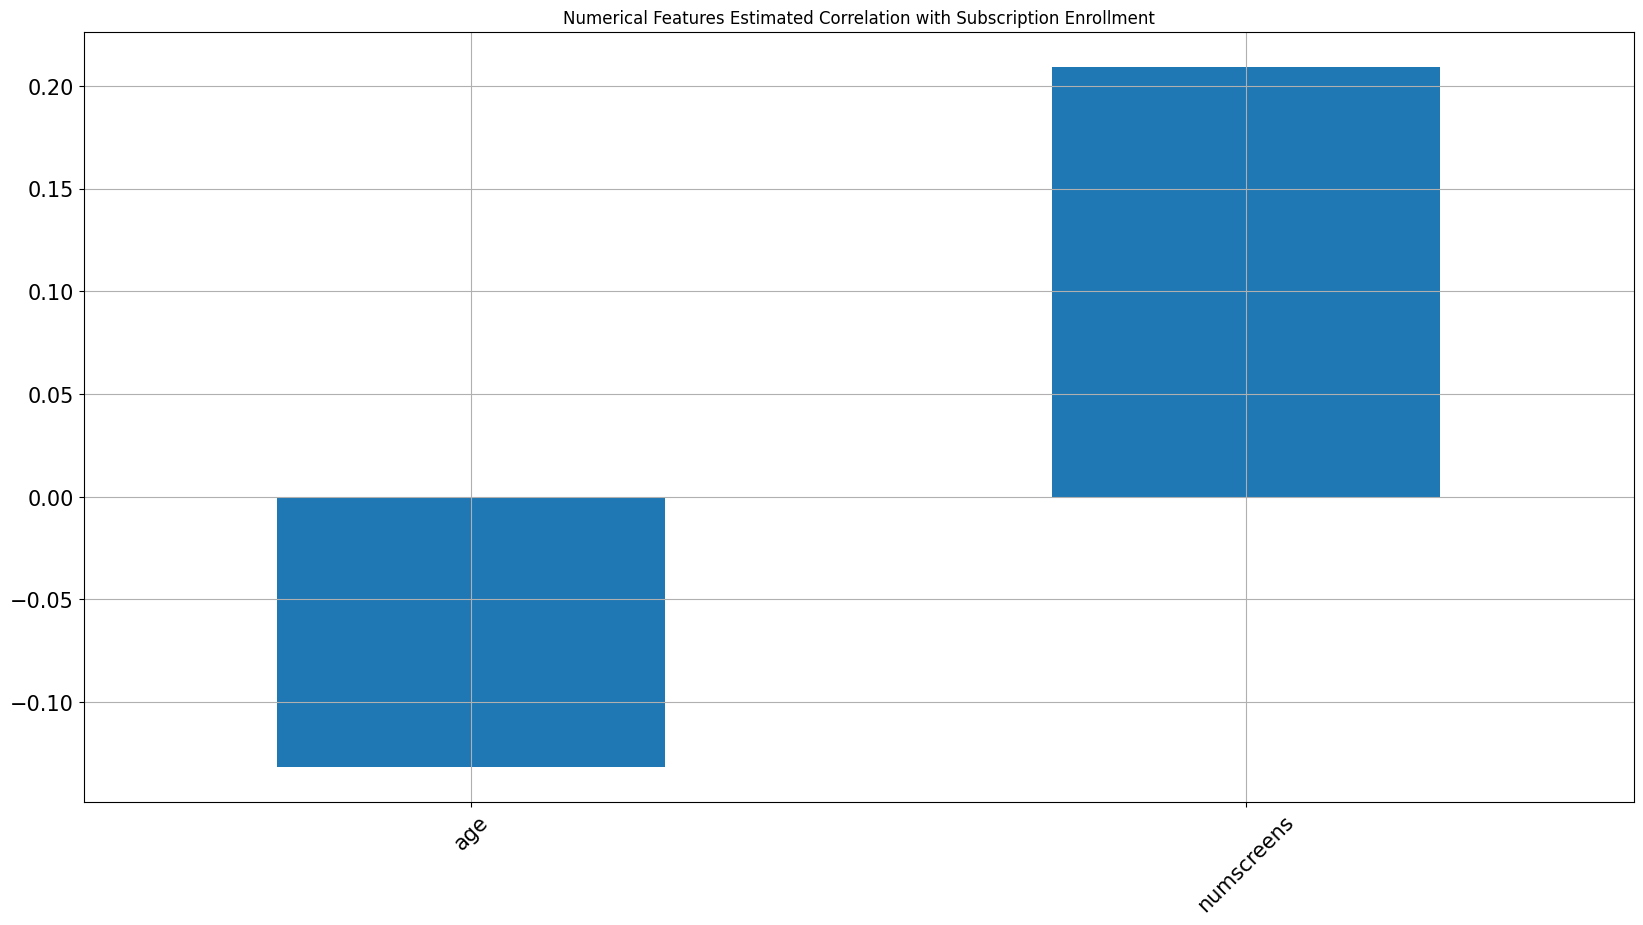

In [15]:
# Evaluate estimated correlations to paid subscription enrollments with numerical features
df_users_numerical.corrwith(df_users.enrolled).plot.bar(figsize = (20, 10), 
                                                        title = 'Numerical Features Estimated Correlation with Subscription Enrollment', 
                                                        fontsize = 15, 
                                                        rot = 45, 
                                                        grid = True)

<Axes: title={'center': 'Categorical Features Estimated Correlation with Subscription Enrollment'}>

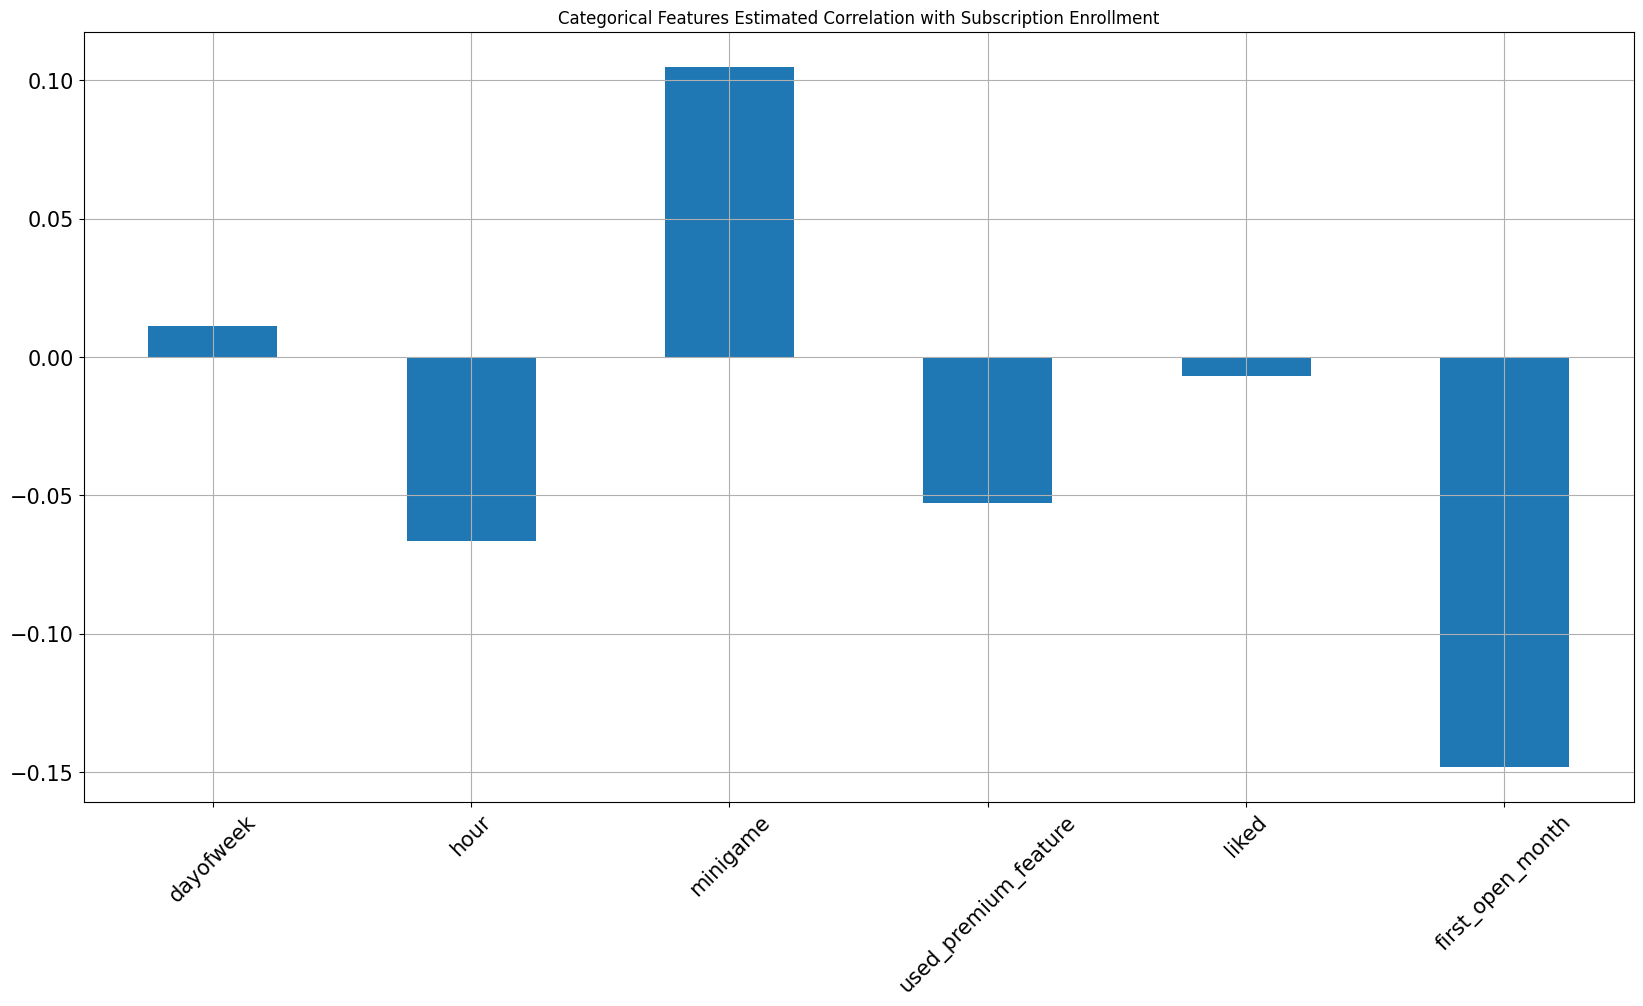

In [16]:
# Filter categorical fields for correlation with response
columns_to_drop = ['enrolled', 'enrolled_date_month', 'enrolled_date_hour']
columns_to_drop = [col for col in columns_to_drop if col in df_cat_filter.columns]
df_cat_filter.drop(columns = columns_to_drop, inplace=True)

# Evaluate estimated correlations to paid subscription enrollments with categorical features
df_cat_filter.corrwith(df_users.enrolled).plot.bar(figsize = (20, 10), 
                                                        title = 'Categorical Features Estimated Correlation with Subscription Enrollment', 
                                                        fontsize = 15, 
                                                        rot = 45, 
                                                        grid = True)

## Correlation Matrix

<Axes: >

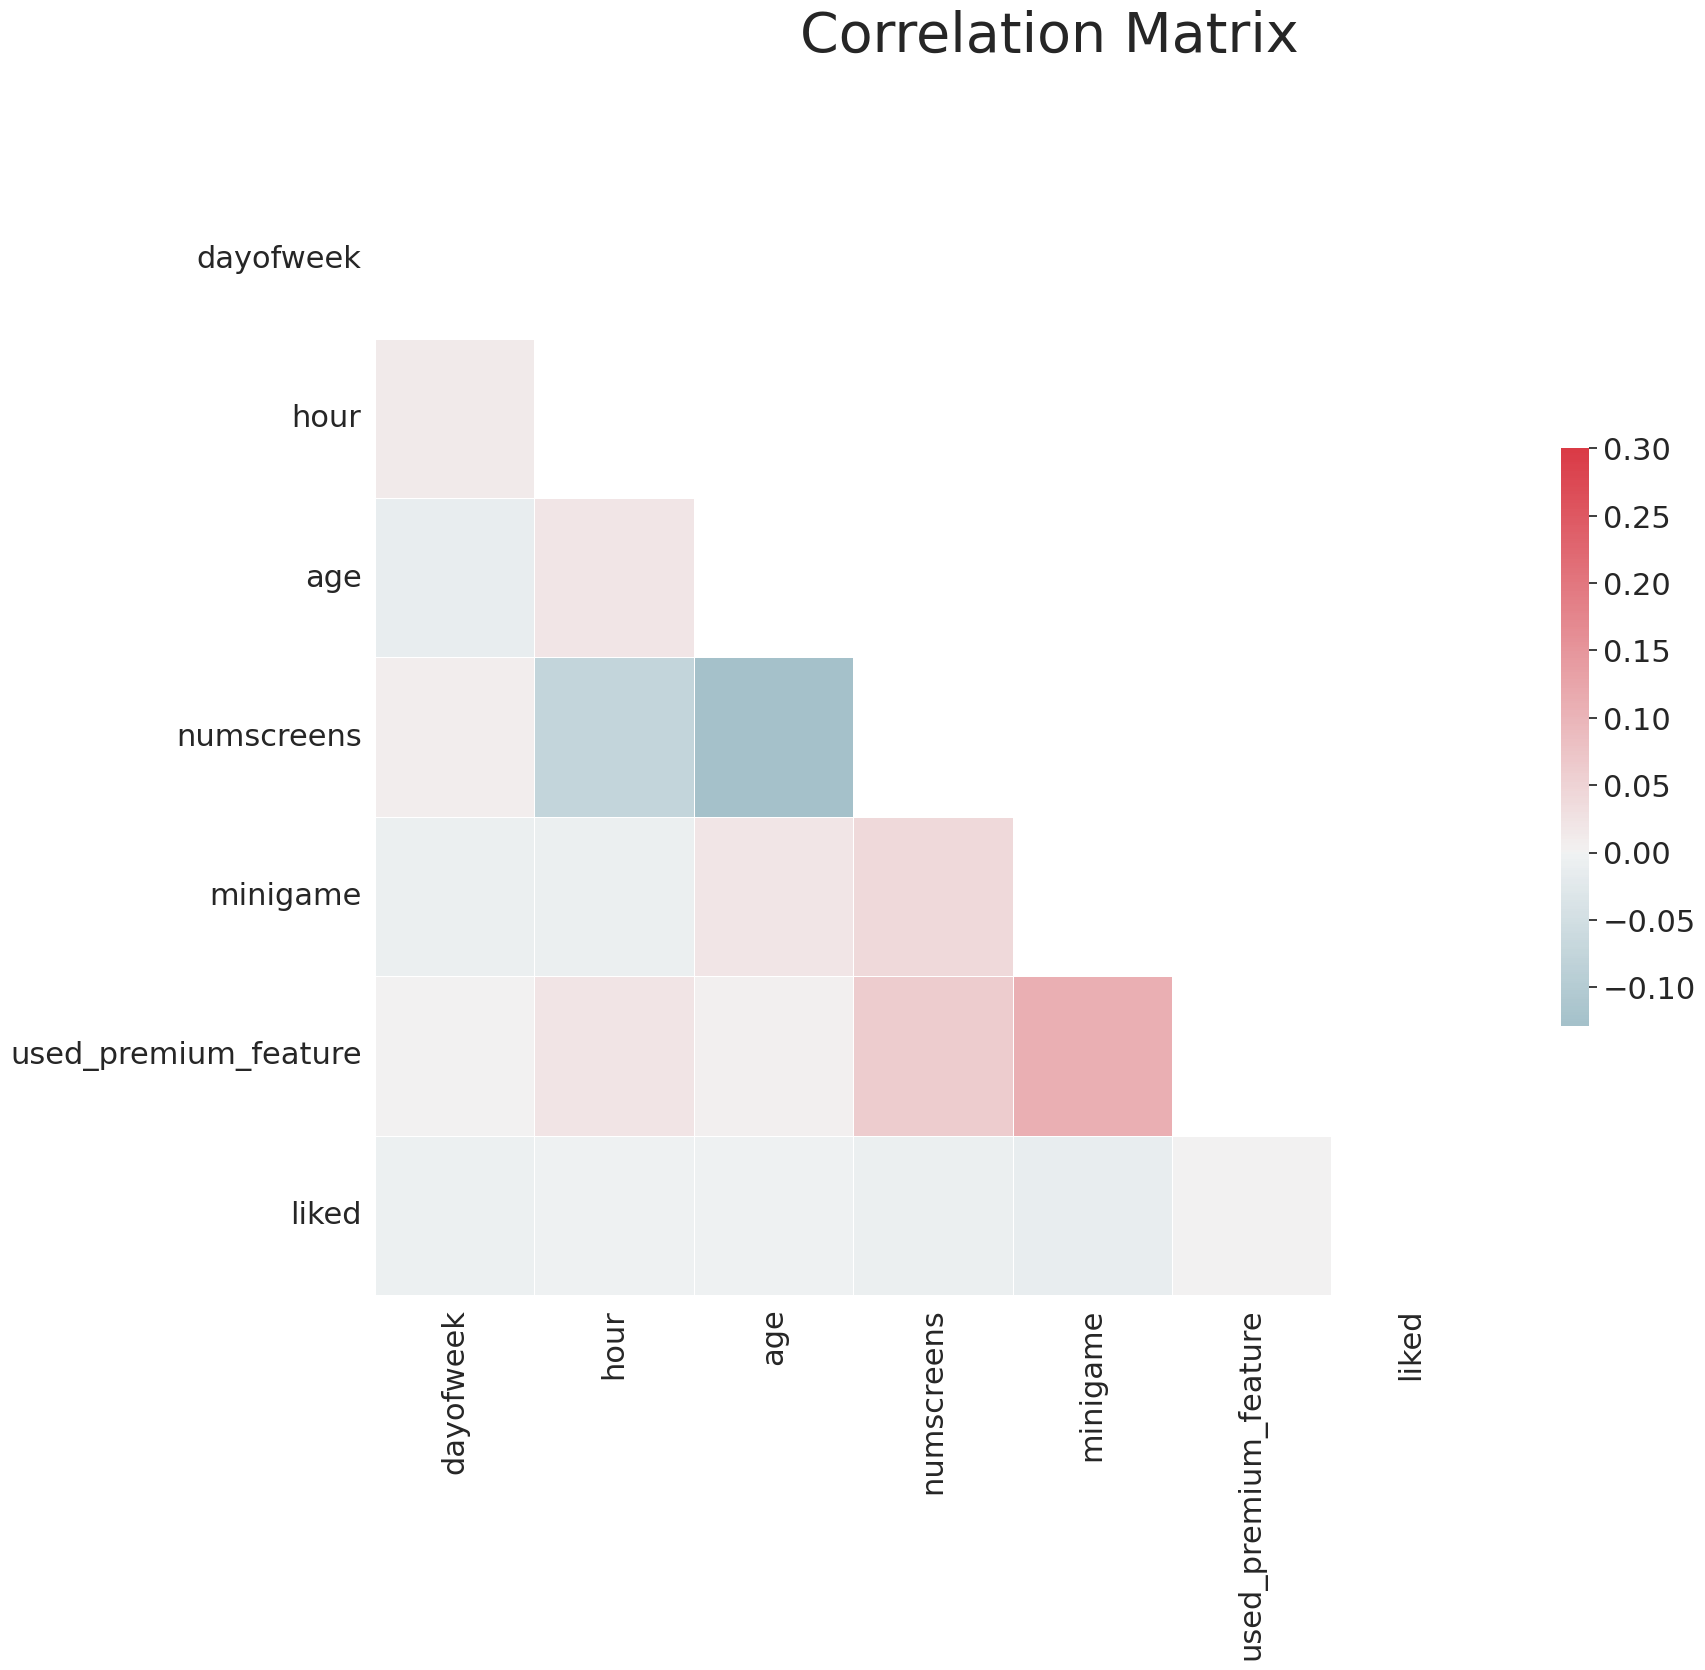

In [17]:
# Estimate fields that are positively and negatively correlated to each other, checking for linear dependence

# Get features of interest
features_of_interest=['dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'liked']
df_users_matrix = df_users[features_of_interest]

# Seaborn 
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = df_users_matrix.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering

## Label Data

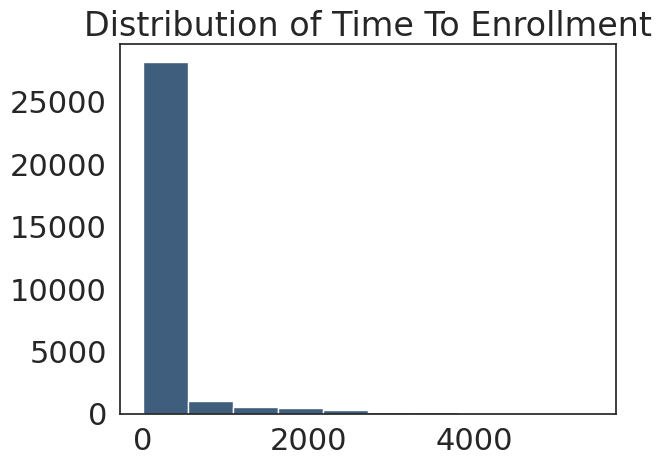

In [18]:
# Determine the difference between 'first_open' and 'enrolled_date' field, convert seconds to hours
df_users["enroll_date_difference"] = (df_users.enrolled_date - df_users.first_open) / pd.Timedelta(hours=1)

# Plot to determine the best hour to select as a cut-off for enrollment wait time
plt.hist(df_users["enroll_date_difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time To Enrollment')
plt.show()

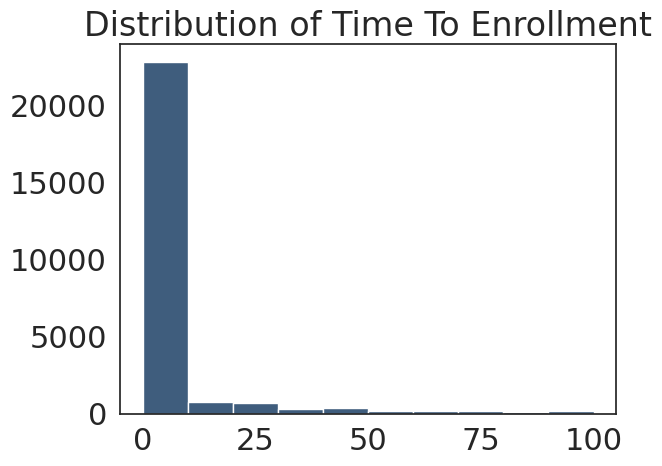

In [19]:
# Create another plot for time to enrollment, restricting hours to less than 100
plt.hist(df_users["enroll_date_difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time To Enrollment')
plt.show()

#### Above we learn the vast majority of enrollments occur within 48 hours, and modify our labels for the model

In [20]:
# Reset all users who enrolled after 48 hours to a negative 'enrolled' status for our model 
df_users.loc[df_users.enroll_date_difference > 48, 'enrolled'] = 0

# Remove data no longer needed
df_users = df_users.drop(columns=['enroll_date_difference', 'enrolled_date', 'first_open'])

## Screen List Data

#### Import Data

In [21]:
# Import data for the most viewed screens, as an array of values
top_screens = pd.read_csv('data/top_app_screens.csv').top_screens.values

#### Interrogate and Distribute Data 

In [22]:
# Create columns for most viewed screens, and another to count the others viewed by the user

# Add a comma to the string list, creating as many commas as there are strings for a later count
df_users['screen_list'] = df_users.screen_list.astype(str) + ','

for screen in top_screens:
    # Create the column for the popular screen, and evaluate if present in the users screen_list
    df_users[screen] = df_users.screen_list.str.contains(screen).astype(int)
    # Remove the popular screen from the screen_list
    df_users['screen_list'] = df_users.screen_list.str.replace(screen+',', '')

# Create a columns with a count for the other screens views by the user
df_users['OtherScreens'] = df_users.screen_list.str.count(',')

# Drop the no longer needed 'screen_list'
df_users = df_users.drop(columns=['screen_list'])

df_users.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


#### Aggregate Highly Correlated Screens Into a Single Funnel 

In [23]:
# Savings Screens funnel
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df_users["SavingScreens"] = df_users[savings_screens].sum(axis=1)
df_users = df_users.drop(columns=savings_screens)

# Credit Monitoring Screens funnel
credit_monitoring_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df_users["CreditMonitoringScreens"] = df_users[credit_monitoring_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_monitoring_screens)

# Credit Card Screens funnel
credit_card_screens = ["CC1", "CC1Category", "CC3"]
df_users["CreditCardScreens"] = df_users[credit_card_screens].sum(axis=1)
df_users = df_users.drop(columns=credit_card_screens)

# Loan Screens funnel
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df_users["LoansScreens"] = df_users[loan_screens].sum(axis=1)
df_users = df_users.drop(columns=loan_screens)

In [24]:
df_users.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,OtherScreens,SavingScreens,CreditMonitoringScreens,CreditCardScreens,LoansScreens
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495740,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## Save Dataset

In [81]:
df_users.to_csv('data/new_app-user-data.csv', index = False)